In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

# Background

A fictitious SaaS (Software as a Service) company operates globally, providing sales and marketing software solutions to various industries, including energy, finance, and more. The company caters to different customer segments, such as Small and Medium Businesses (SMBs), Strategic clients, and Enterprise customers. While the company is growing, it faces challenges in maximizing profitability, managing customer relationships, and optimizing its sales strategy.

The SaaS company offers multiple products under various licensing models and applies discounts to transactions, which can influence sales volumes and profit margins. With a large and diverse customer base across different regions and industries, understanding the drivers of sales performance, customer behavior, and profitability is crucial to sustaining growth and improving the business's overall financial health.

# Problem Statement 

How can AWS **improve sales and profitability by identifying key factors that influence SaaS product performance, customer behavior, and discount effectiveness across different regions and industries?**


# Data Loading & Exploration (EDA)
To answer the questions above, we will analyze participant data that has been collected by the company. The dataset is accessible [here](https://drive.google.com/drive/folders/1dlpJfgvs8P_IyXqWB4WrNwk91fx0XAzU). 

This dataset contains transaction data from a fictitious SaaS company selling sales and marketing
software to other companies (B2B). In the dataset, each row represents a product in a transaction,
and the columns include:

1. Row ID: A unique identifier for each transaction.
2. Order ID: A unique identifier for each order.
3. Order Date: The date when the order was placed.
4. Date Key: A numerical representation of the order date (YYYYMMDD).
5. Contact Name: The name of the person who placed the order.
6. Country: The country where the order was placed.
7. City: The city where the order was placed.
8. Region: The region where the order was placed.
9. Subregion: The subregion where the order was placed.
10. Customer: The name of the company that placed the order.
11. Customer ID: A unique identifier for each customer.
12. Industry: The industry the customer belongs to.
13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
14. Product: The product was ordered.
15. License: The license key for the product.
16. Sales: The total sales amount for the transaction.
17. Quantity: The total number of items in the transaction.
18. Discount: The discount applied to the transaction.
19. Profit: The profit from the transaction


Here are the first and last 5 rows from the AWS SaaS Sales dataset:

In [2]:
df=pd.read_csv('SaaS-Sales.csv')
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [4]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

In [5]:
# Verify the data type after conversion
print(df['Order Date'].dtype)

# Check a few rows to ensure the conversion worked correctly
print(df[['Order Date']].head())


datetime64[ns]
  Order Date
0 2022-11-09
1 2022-11-09
2 2022-06-13
3 2021-10-11
4 2021-10-11


In [6]:
# Summary statistics for numerical columns (e.g., Sales, Profit, Discount)
df.describe()

,Row ID,Order Date,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2022-05-01 00:07:12.259355648,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
min,1.000000,2020-01-04 00:00:00,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2021-05-23 00:00:00,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2022-06-27 00:00:00,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2023-05-15 00:00:00,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2023-12-31 00:00:00,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108


In [7]:
# Check for unique values in important columns:
print(f' Unique values in Customer columns: {df['Customer'].nunique()}')
print(f' Unique values in Product columns: {df['Product'].nunique()}')


 Unique values in Customer columns: 99
 Unique values in Product columns: 14


# Data Cleaning 

In [8]:
# Check for missing value
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


**The data is clean, there is no missing values and duplicates,** so we can continue to the next step.

First, we need to check the data is normally distributed or not.

We will check it using **Shapiro-Wilk test for normality.**

In [10]:
# Perform Shapiro-Wilk Test for Normality

columns_to_check = ['Sales', 'Profit', 'Discount', 'Quantity']

for column in columns_to_check:
    stat, p_value = stats.shapiro(df[column])
    print(f"Shapiro-Wilk Test for {column}:")
    print(f"Statistic={stat}, p-value={p_value}")
    if p_value > 0.05:
        print(f"{column} is likely normally distributed (p-value > 0.05).\n")
    else:
        print(f"{column} is not normally distributed (p-value <= 0.05).\n")


Shapiro-Wilk Test for Sales:
Statistic=0.32332715724629535, p-value=4.065053524283138e-105
Sales is not normally distributed (p-value <= 0.05).

Shapiro-Wilk Test for Profit:
Statistic=0.25709707779832647, p-value=1.6987856431860357e-107
Profit is not normally distributed (p-value <= 0.05).

Shapiro-Wilk Test for Discount:
Statistic=0.7107060506949305, p-value=1.030847481822623e-84
Discount is not normally distributed (p-value <= 0.05).

Shapiro-Wilk Test for Quantity:
Statistic=0.88239102820559, p-value=1.5185663017552264e-65
Quantity is not normally distributed (p-value <= 0.05).



All of the data is not normally distributed.

The next step is to **Identify and Handle Outliers**

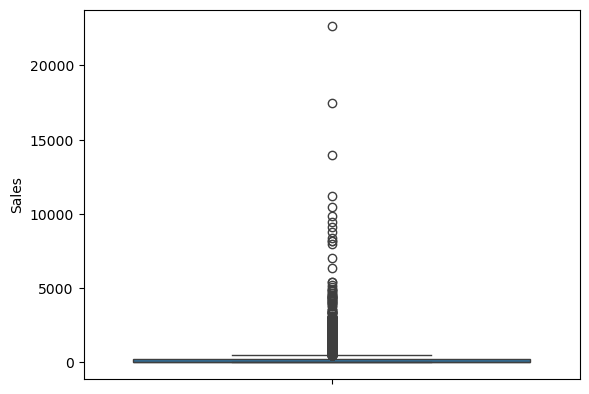

In [11]:
# Visualize outliers in Sales
sns.boxplot(df['Sales'])
plt.show()

Choice: **IQR Method**, why?

1. Simplicity: IQR is straightforward to understand and implement
2. Non-parametric: Doesn't assume normal distribution of data
3. Robustness: Less sensitive to extreme values compared to mean/standard deviation

Next we decide to handling outliers using **Capping Method**, why? 
1. Retaining Valuable Data: Capping allows us to keep all data points, which can be essential in maintaining the dataset's integrity and leveraging all possible insights.
2. Preserving Patterns: Capping reduces extreme outlier influence without entirely discarding those points.
3. Skewness Control: Capping based on IQR can reduce the skewness and provide a more normalized distribution, improve the performance and accuracy.
4. Ensuring Comparability: Capping provides a more balanced view, as excessive outliers could disproportionately affect aggregate metrics and lead to misleading interpretations.

In [12]:
# Function to cap outliers using IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers instead of removing them
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return df


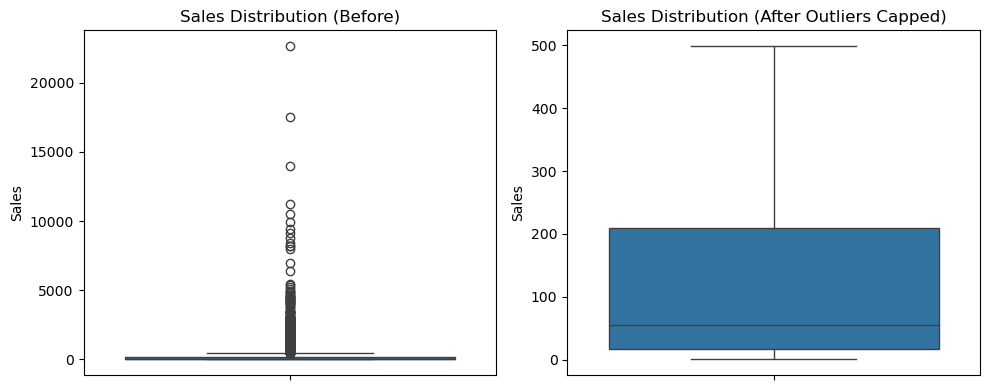

In [13]:
# Visualizing Sales before and after capping outliers
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Sales'])
plt.title('Sales Distribution (Before)')

# Cap outliers for Sales
df_capped_sales = cap_outliers(df, 'Sales')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_capped_sales['Sales'])
plt.title('Sales Distribution (After Outliers Capped)')

plt.tight_layout()
plt.show()

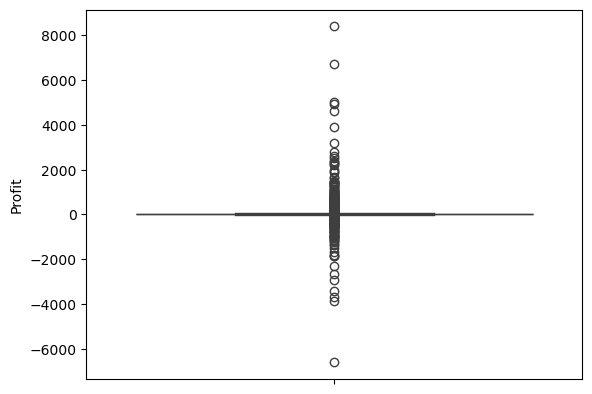

In [14]:
# Visualize outliers in Profit
sns.boxplot(df['Profit'])
plt.show()

Text(0.5, 1.0, 'Profit Distribution (After Outliers Capped)')

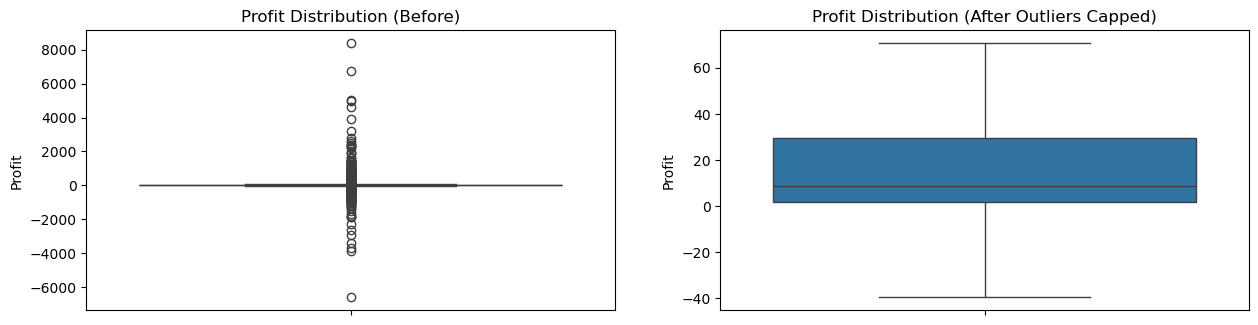

In [15]:
plt.figure(figsize=(15, 8))

# Profit column
plt.subplot(2, 2, 1)
sns.boxplot(y=df['Profit'])
plt.title('Profit Distribution (Before)')

# Cap outliers for Profit
df_capped_profit = cap_outliers(df, 'Profit')

plt.subplot(2, 2, 2)
sns.boxplot(y=df_capped_profit['Profit'])
plt.title('Profit Distribution (After Outliers Capped)')

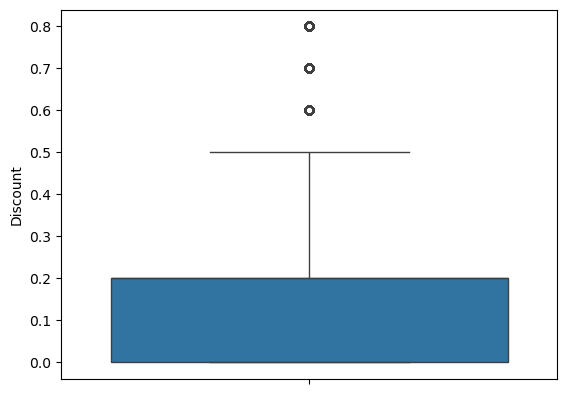

In [16]:
# Visualize outliers in Discount
sns.boxplot(df['Discount'])
plt.show()

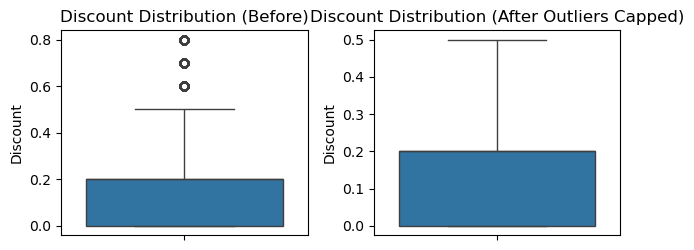

In [17]:
plt.subplot(2, 2, 3)
sns.boxplot(y=df['Discount'])
plt.title('Discount Distribution (Before)')

# Cap outliers for Discount
df_capped_discount = cap_outliers(df, 'Discount')

plt.subplot(2, 2, 4)
sns.boxplot(y=df_capped_discount['Discount'])
plt.title('Discount Distribution (After Outliers Capped)')

plt.tight_layout()
plt.show()

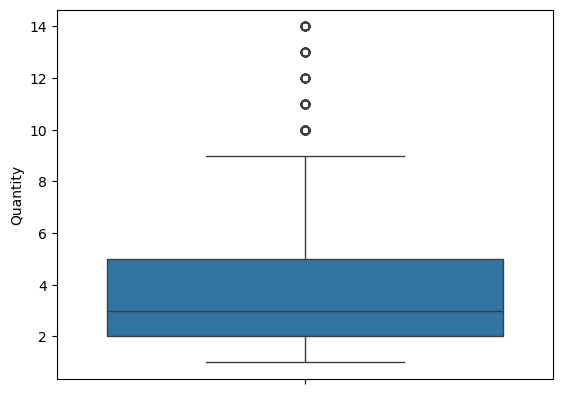

In [18]:
# Visualize outliers in Quantity
sns.boxplot(df['Quantity'])
plt.show()

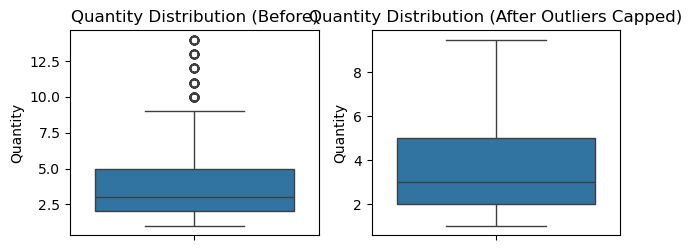

In [19]:
plt.subplot(2, 2, 3)
sns.boxplot(y=df['Quantity'])
plt.title('Quantity Distribution (Before)')

# Cap outliers for Discount
df_capped_discount = cap_outliers(df, 'Quantity')

plt.subplot(2, 2, 4)
sns.boxplot(y=df_capped_discount['Quantity'])
plt.title('Quantity Distribution (After Outliers Capped)')

plt.tight_layout()
plt.show()

Since the boxplots show no remaining outliers and the data looks clean, it's safe to proceed to the next step.

# Data Transformation & Feature Engineering

1. **Create New Features**

    * **Profit Margin** : This feature will help us to evaluate profitability across different sales. It is calculated as Profit / Sales.
    * **Discount Effectiveness**: We can measure how discounts affect sales or profit. A simple way is to observe the relationship between Discount and Profit.
    * **Sales per Unit Quantity**: This will help in understanding the relationship between sales and quantity sold.

In [20]:
# Create 'Profit Margin'
df['Profit Margin'] = df['Profit'] / df['Sales']

# Discount Effectiveness
df['Discount Effectiveness'] = df['Profit'] / df['Discount']
# Avoid division by zero by handling zero discount cases
df['Discount Effectiveness'] = np.where(df['Discount'] == 0, 0, df['Profit'] / df['Discount'])

# Sales per unit quantity
df['Sales per Unit'] = df['Sales'] / df['Quantity']

2. **Time-based Features**
    * **Year**: To group data by year and compare performance over different years.
    * **Month**: To identify seasonal trends in sales and profitability.

In [21]:
# Extract year and month from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

3. **Segment Data by Regions/Industries**
    * Group the data based on Region, Subregion, or Industry to analyze how sales, profit, and discounts vary across different geographical or industrial segments.

In [22]:
# Group by Region and Industry for aggregated insights
region_industry_agg = df.groupby(['Region', 'Industry']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean',
    'Quantity': 'sum'
}).reset_index()

# Exploratory Data Analysis (EDA)

In this step, we will uncover insights from the data by analyzing sales, profitability, and customer behavior across different regions and industries, while visualizing important trends.

The objective here is to identify key patterns in the dataset, especially regarding the factors that influence sales, profitability, customer behavior, and discount effectiveness.

1. **Overall Sales and Profit Summary**

    * **Total Sales and Profit**: Use aggregation to summarize total sales, profit, and average discount across the entire dataset.

In [23]:
# Overall sales, profit, and average discount
overall_summary = df.agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean',
    'Quantity': 'sum'
})
print(overall_summary)

Sales       1.401969e+06
Profit      1.605837e+05
Discount    1.374515e-01
Quantity    3.751100e+04
dtype: float64


2. **Sales and Profit by Region**

Next, we’ll group the data by Region to identify regional performance. This helps understand which regions contribute the most to overall sales and profit.

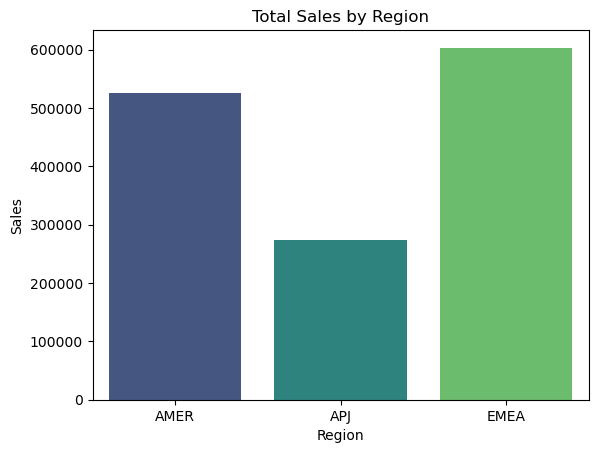

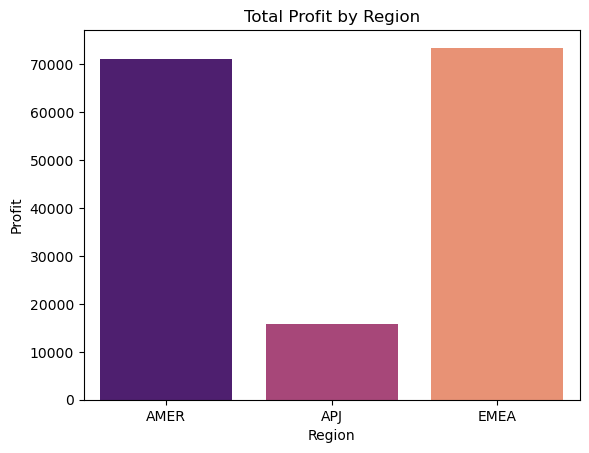

In [24]:
# Sales and profit by Region
region_summary = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean',
    'Quantity': 'sum'
}).reset_index()

#plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=region_summary, palette='viridis')
plt.title('Total Sales by Region')
plt.show()
#plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=region_summary, palette='magma')
plt.title('Total Profit by Region')
plt.show()

* EMEA leads in sales followed by AMER

3. **Sales and Profit by Industry**

We can also analyze how sales and profitability differ across industries.

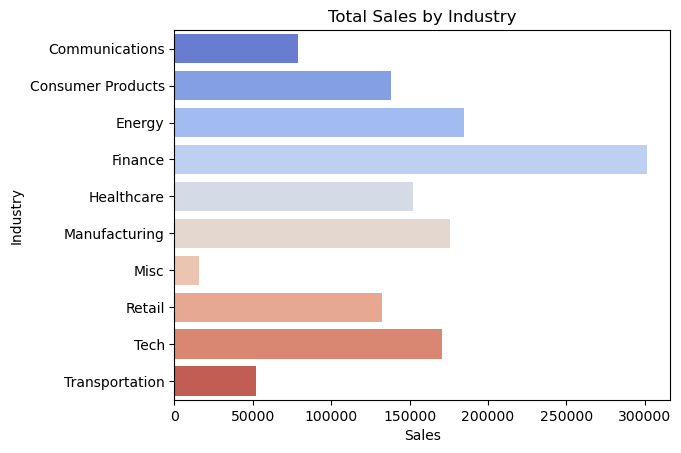

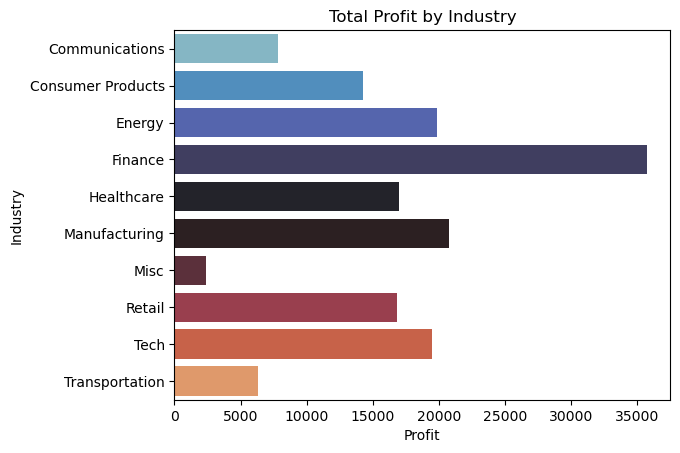

In [25]:
# Sales and profit by Industry
industry_summary = df.groupby('Industry').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean',
    'Quantity': 'sum'
}).reset_index()

# Visualize sales and profit by industry
#plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Industry', data=industry_summary, palette='coolwarm')
plt.title('Total Sales by Industry')
plt.show()

#plt.figure(figsize=(12, 6))
sns.barplot(x='Profit', y='Industry', data=industry_summary, palette='icefire')
plt.title('Total Profit by Industry')
plt.show()

* Finance sector dominates both sales and profits
* Tech and Energy sectors also show strong performance in both metrics
* Despite high sales, some industries like Manufacturing show lower profit margins compared to their sales volume

4. **Discount Effectiveness**

Next, evaluate how discounts are affecting profit across regions or industries.

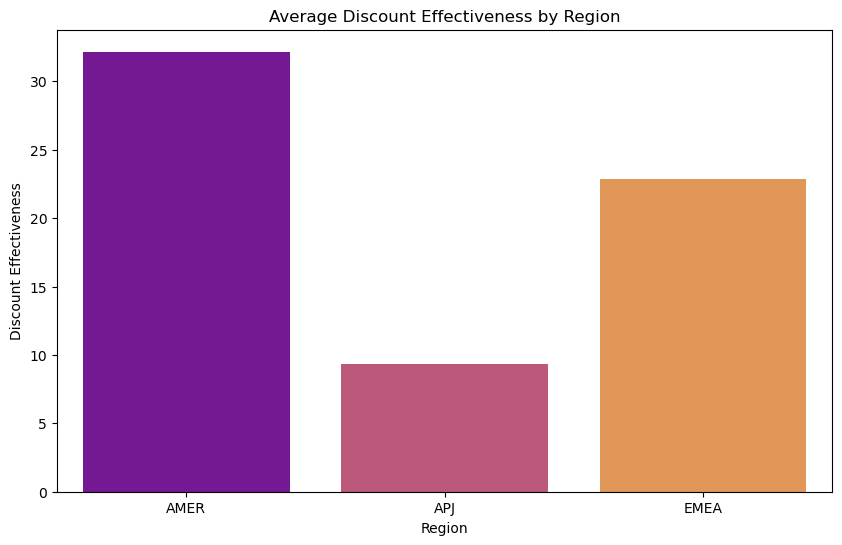

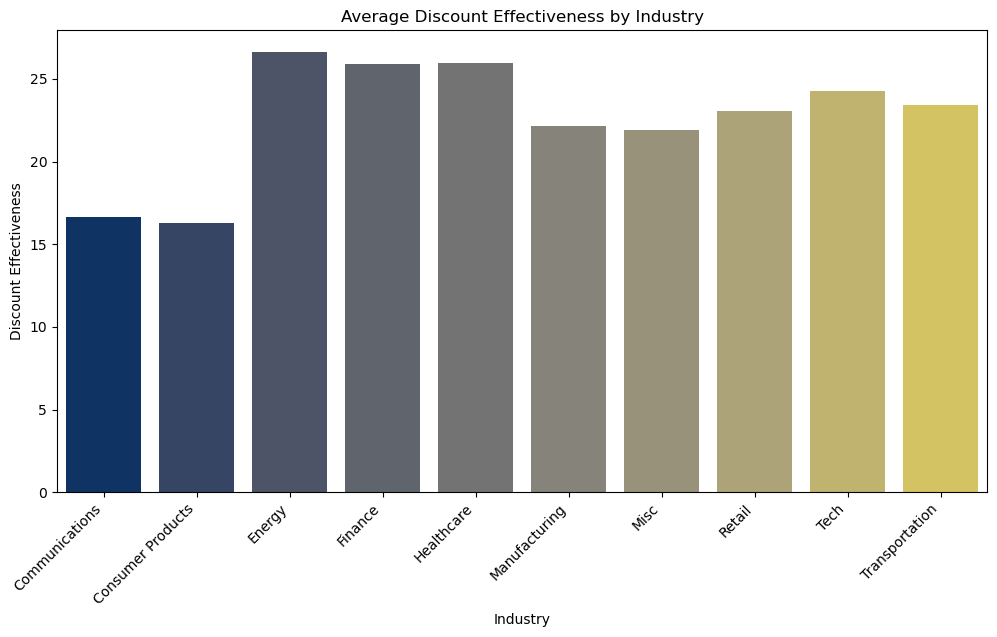

In [41]:
# Discount effectiveness by Region
discount_effectiveness_region = df.groupby('Region').agg({
    'Discount Effectiveness': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Discount Effectiveness', data=discount_effectiveness_region, palette='plasma')
plt.title('Average Discount Effectiveness by Region')
plt.show()

# Discount effectiveness by Industry
discount_effectiveness_industry = df.groupby('Industry').agg({
    'Discount Effectiveness': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Industry', y='Discount Effectiveness', data=discount_effectiveness_industry, palette='cividis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Discount Effectiveness by Industry')
plt.show()


* AMER shows the highest discount effectiveness (~32%), significantly higher than EMEA (~22%) and APJ (~9%)
* By industry, Energy, Finance, and Healthcare show the best discount effectiveness (25-27%)
* Communications and Consumer Products show the lowest discount effectiveness (15-16%)
* This suggests discounts work best in AMER region and energy/finance sectors

5. **Time-Based Analysis: Sales Trends Over Time**

Analyze trends in sales and profit over time to see any seasonal or yearly patterns.

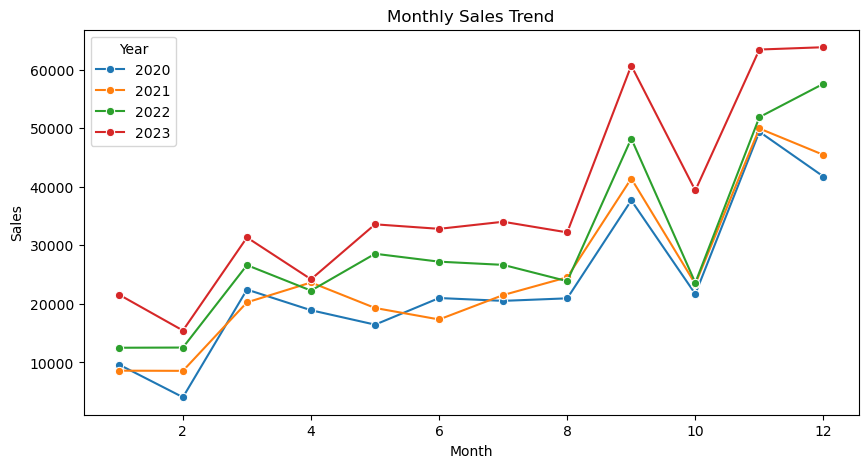

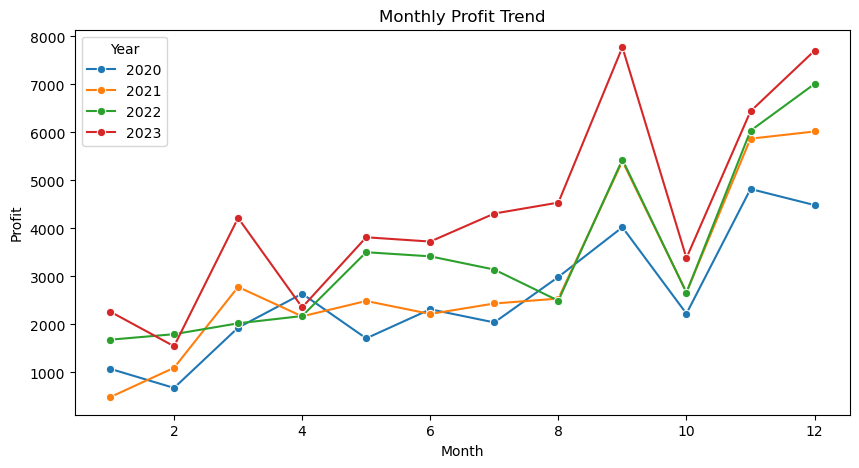

In [27]:
# Monthly Sales Trend
monthly_sales = df.groupby(['Year', 'Month']).agg({'Sales': 'sum'}).reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Month', y='Sales', hue='Year', data=monthly_sales, palette='tab10', marker='o')
plt.title('Monthly Sales Trend')
plt.show()

# Monthly Profit Trend
monthly_profit = df.groupby(['Year', 'Month']).agg({'Profit': 'sum'}).reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Month', y='Profit', hue='Year', data=monthly_profit, palette='tab10', marker='o')
plt.title('Monthly Profit Trend')
plt.show()

* Clear year-over-year growth from 2020 to 2023
* Strong seasonality pattern with peaks in:
    - September (Month 9)
    - November-December (Months 11-12)
* Consistent dip in October (Month 10) across all years
* 2023 shows the strongest performance, particularly in peak seasons
* Profit trends closely mirror sales patterns, indicating consistent margins

6. **Top Customers by Sales**

Identify the top customers in terms of sales to get insights into customer behavior.

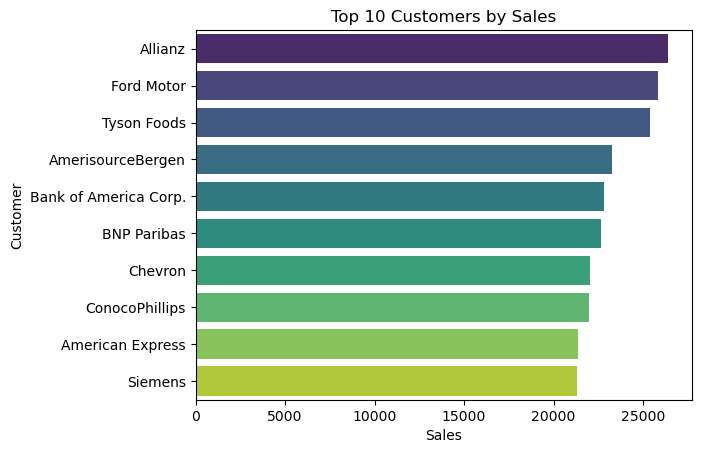

In [28]:
# Top customers by sales
top_customers = df.groupby('Customer').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).sort_values(by='Sales', ascending=False).head(10).reset_index()

#plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Customer', data=top_customers, palette='viridis')
plt.title('Top 10 Customers by Sales')
plt.show()

* Allianz, Ford Motor, and Tyson Foods are the top 3 customers by sales
* Strong presence of financial institutions (Bank of America, BNP Paribas, American Express)
* Energy sector companies (Chevron, ConocoPhillips) feature prominently
* Top 10 customers show relatively even distribution of sales (20,000-25,000 range)
* Mix of industries among top customers suggests good sector diversification

# Statistical Analysis

Performing statistical analysis will help strengthen our findings and provide data-driven evidence to support our insights and recommendations. We can apply both descriptive and inferential statistics to analyze the relationships between key variables.

1. **Descriptive Statistics**

We’ll start by summarizing the key metrics (e.g., sales, profit, discount, and quantity) across regions and industries. This will provide a clearer understanding of the data distribution.

In [29]:
# Descriptive statistics for key metrics
df[['Sales', 'Profit', 'Discount', 'Quantity', 'Profit Margin', 'Discount Effectiveness']].describe()

,Sales,Profit,Discount,Quantity,Profit Margin,Discount Effectiveness
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,140.281105,16.068014,0.137451,3.753352,0.131592,23.407216
std,168.804241,29.486488,0.157680,2.102557,0.403800,102.233722
min,0.444000,-39.724125,0.000000,1.000000,-2.750000,-264.827500
25%,17.280000,1.728750,0.000000,2.000000,0.075000,0.000000
50%,54.490000,8.666500,0.200000,3.000000,0.245918,0.000000
75%,209.940000,29.364000,0.200000,5.000000,0.350000,18.216000
max,498.930000,70.816875,0.500000,9.500000,0.500000,708.168750


2. **Correlation Analysis**

We can examine the correlation between key variables (e.g., sales, profit, discount, and quantity) to identify relationships. This will help us understand how one variable affects another.

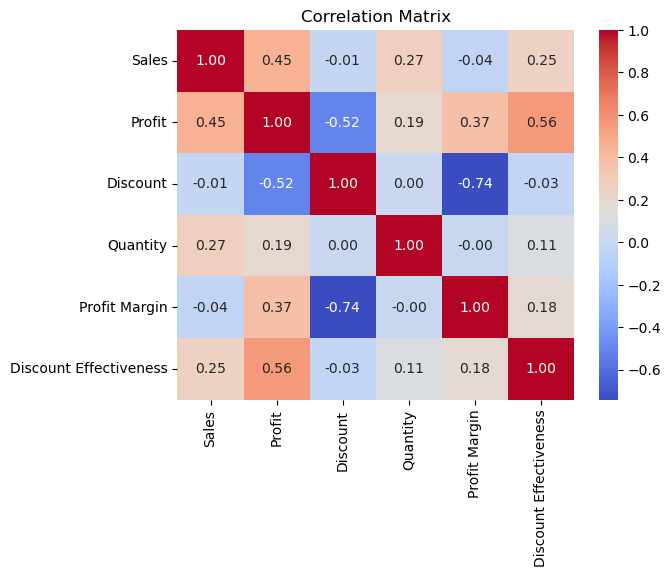

In [30]:
# Correlation matrix for key variables
corr_matrix = df[['Sales', 'Profit', 'Discount', 'Quantity', 'Profit Margin', 'Discount Effectiveness']].corr()

#plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

From this correlation matrix, here are the key insights and potential hypotheses to test:
Key Insights:

1. Strong Negative Correlations:
    * Discount and Profit Margin (-0.74): Higher discounts strongly correlate with lower profit margins
    * Discount and Profit (-0.52): Discounts negatively impact overall profits

2. Moderate Positive Correlations:
    * Discount Effectiveness and Profit (0.56): When discounts are effective, they do drive profit
    * Sales and Profit (0.45): As expected, higher sales generally lead to higher profits
    * Profit Margin and Profit (0.37): Higher margins contribute to better profits

3. Weak or No Correlations:
    * Sales and Discount (-0.01): Almost no direct relationship
    * Quantity and Profit Margin (-0.00): Volume doesn't necessarily affect margins
    * Quantity and Discount (0.00): Discounts don't significantly impact purchase volumes

3. Hypothesis Testing

    To confirm some of our key insights, we can perform statistical tests like t-tests or ANOVA. Here are three potential hypotheses based on our analysis:

1. **Hypothesis 1 (H1): Discounts significantly impact profit margins.**

    * Rationale: We found a strong negative correlation (-0.74) between discount and profit margin. This suggests that higher discounts lead to lower margins.
    * Test: Perform a t-test to determine if profit margins differ significantly between high and low discount levels.

In [31]:
# High and low discount groups for profit margin
high_discount_margin = df[df['Discount'] > df['Discount'].median()]['Profit Margin']
low_discount_margin = df[df['Discount'] <= df['Discount'].median()]['Profit Margin']

# Perform t-test
t_test_margin = stats.ttest_ind(high_discount_margin, low_discount_margin)
print("t-test result for profit margin based on discount levels:", t_test_margin)

t-test result for profit margin based on discount levels: TtestResult(statistic=-110.93337177073009, pvalue=0.0, df=9992.0)


Since the p-value is extremely low (0.0), we reject the null hypothesis. This confirms that there is a significant difference in profit margins between high and low discount levels. Given the negative t-statistic, it indicates that higher discount levels are associated with lower profit margins, which is consistent with the strong negative correlation (-0.74) you found earlier.

2. Hypothesis 2 (H2): Effective discounts drive higher profits.

    * Rationale: A moderate positive correlation (0.56) between discount effectiveness and profit suggests that when discounts are well-targeted or effective, they contribute to higher profits.
    * Test: Use a t-test to compare profits between transactions with high and low discount effectiveness.

In [32]:
# High and low discount effectiveness groups for profit
high_effectiveness_profit = df[df['Discount Effectiveness'] > df['Discount Effectiveness'].median()]['Profit']
low_effectiveness_profit = df[df['Discount Effectiveness'] <= df['Discount Effectiveness'].median()]['Profit']

# Perform t-test
t_test_effectiveness = stats.ttest_ind(high_effectiveness_profit, low_effectiveness_profit)
print("t-test result for profit based on discount effectiveness:", t_test_effectiveness)

t-test result for profit based on discount effectiveness: TtestResult(statistic=10.368144603000687, pvalue=4.637569166517079e-25, df=9992.0)


The p-value is extremely small (almost zero), so we reject the null hypothesis. This confirms that there is a significant difference in profits between transactions with high and low discount effectiveness. The positive t-statistic indicates that higher discount effectiveness is associated with higher profits, which aligns with the moderate positive correlation (0.56) you observed.

3. Hypothesis 3 (H3): Sales and profit are positively correlated.

    * Rationale: A moderate positive correlation (0.45) between sales and profit indicates that higher sales generally lead to higher profits.
    * Test: Use an ANOVA to test if regions with higher sales have significantly different profits.

In [33]:
# Perform ANOVA test for profit across regions
anova_sales_profit = stats.f_oneway(df[df['Region'] == 'EMEA']['Profit'],
                                    df[df['Region'] == 'AMER']['Profit'],
                                    df[df['Region'] == 'APJ']['Profit'])

print("ANOVA test result for profit across regions:", anova_sales_profit)

ANOVA test result for profit across regions: F_onewayResult(statistic=119.87929676595061, pvalue=3.5641358860981525e-52)


The p-value is extremely small (essentially zero), so we reject the null hypothesis. This confirms that there are significant differences in profit across regions. Based on your prior analysis, this aligns with the observation that regions like EMEA lead in both sales and profit, whereas APJ lags behind.

**Summary of Findings from Hypothesis Testing**

1. **Discounts**: Higher discount levels significantly lower profit margins. AWS should be cautious about offering steep discounts as they erode profitability.

2. **Discount Effectiveness**: Effective discounts do indeed drive higher profits. AWS should focus on optimizing discount strategies (especially in AMER and industries like Energy and Finance) to ensure they are well-targeted and yield positive results.

3. **Regional Differences**: There are significant differences in profitability across regions. AWS should leverage the strong performance in EMEA and continue to improve profitability in APJ by reevaluating their sales and discount strategies.

# Data Visualization

1. **Profit Margin Based on Discount Levels**

    To show the effect of discount levels on profit margin, we can use a box plot to compare the distribution of profit margins for high and low discount groups.

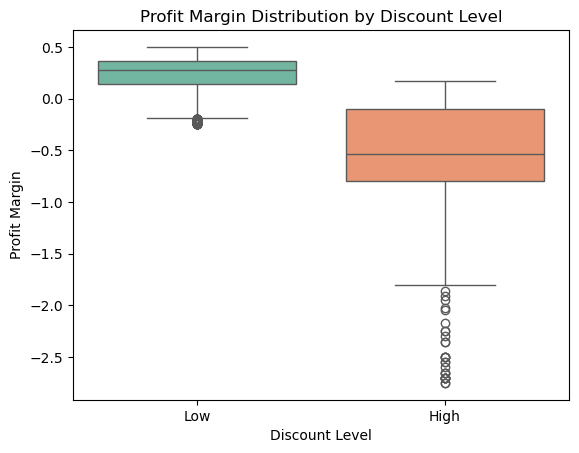

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column for high/low discount levels
df['Discount Level'] = df['Discount'].apply(lambda x: 'High' if x > df['Discount'].median() else 'Low')

# Box plot for Profit Margin by Discount Level
# plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Discount Level', y='Profit Margin', palette='Set2')
plt.title('Profit Margin Distribution by Discount Level')
plt.xlabel('Discount Level')
plt.ylabel('Profit Margin')
plt.show()

* The box plot clearly supports the first hypothesis finding:
* Low discount level shows:
    * Higher median profit margin (around 0.25)
    * Tighter distribution (less variance)
    * Few outliers

* High discount level shows:
    * Lower median profit margin (around -0.5)
    * Wider distribution indicating more volatility
    * Multiple negative outliers (down to -2.5)

* This strongly validates the caution against steep discounts, showing they not only reduce margins but also introduce more unpredictability in profitability

2. **Profit Based on Discount Effectiveness**

    A box plot will help illustrate the difference in profit distribution for high and low discount effectiveness levels.

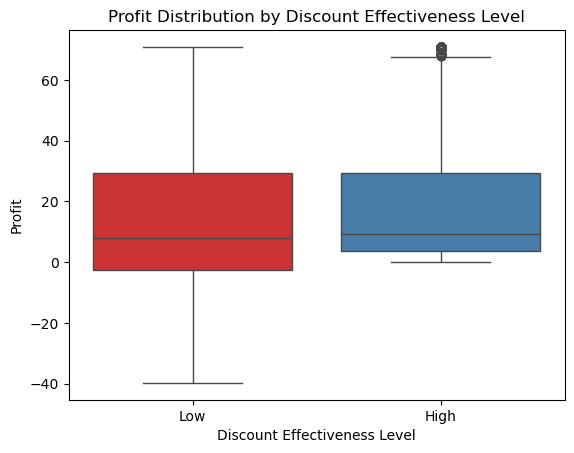

In [35]:
# Create a new column for high/low discount effectiveness
df['Discount Effectiveness Level'] = df['Discount Effectiveness'].apply(lambda x: 'High' if x > df['Discount Effectiveness'].median() else 'Low')

# Box plot for Profit by Discount Effectiveness Level
# plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Discount Effectiveness Level', y='Profit', palette='Set1')
plt.title('Profit Distribution by Discount Effectiveness Level')
plt.xlabel('Discount Effectiveness Level')
plt.ylabel('Profit')
plt.show()

* The box plot reveals interesting nuances about discount effectiveness:
* High effectiveness shows:
    * Similar median profit to low effectiveness
    * Higher positive outliers (up to 70)
    * More consistent profit distribution

* Low effectiveness shows:
    * More negative outliers (down to -40)
    * Wider distribution in the lower quartile

* This supports the second hypothesis about optimizing discount strategies, showing that when discounts are effective, they can maintain profitability while reducing downside risk

3. **Profit Across Regions**

    To highlight the differences in profitability across regions, we can use a bar plot showing the average profit per region.

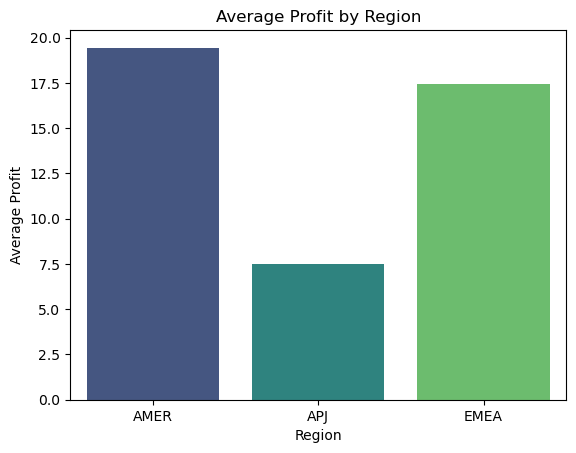

In [36]:
# Bar plot for average profit by region
avg_profit_region = df.groupby('Region')['Profit'].mean().reset_index()

# plt.figure(figsize=(8, 6))
sns.barplot(data=avg_profit_region, x='Region', y='Profit', palette='viridis')
plt.title('Average Profit by Region')
plt.xlabel('Region')
plt.ylabel('Average Profit')
plt.show()

* The bar chart strongly supports the regional differences hypothesis:
* AMER shows highest average profit (~19)
* EMEA close second (~17)
* APJ significantly lower (~7)
* This validates the recommendation to:
    * Learn from successful AMER/EMEA strategies
    * Focus on improving APJ performance
    * Consider region-specific discount approaches

# Strategic Implications:

1. Implement tight controls on discount levels
2. Develop region-specific discount strategies
3. Study successful cases in AMER/EMEA for APJ improvement
4. Consider customer segmentation based on discount effectiveness

# Key Findings

1. Regions and Industries Driving Sales and Profit
    * Region Analysis:
        * EMEA leads in sales (~600,000 units) with AMER closely following (~520,000 units).
        * Profit: AMER shows the highest average profit per sale (~19), followed by EMEA (~17), while APJ is considerably lower (~7).
        * Seasonality: Sales peak in September and November-December with a dip in October across all years; growth is observed year-over-year from 2020 to 2023.
    
    * Industry Analysis:
        * Finance is the top-performing sector with ~300,000 sales and the highest total profit (~35,000).
        * Tech and Energy industries also perform strongly in both sales and profit.
        * Manufacturing shows high sales but low profit margins, indicating an area of potential optimization.

2. Discount Effectiveness
    * Regional Effectiveness:
        * AMER has the highest discount effectiveness (~32%), notably higher than EMEA (~22%) and APJ (~9%).
    * Industry Effectiveness:
        * Energy, Finance, and Healthcare sectors show strong discount effectiveness (25-27%).
        * Communications and Consumer Products have the lowest discount effectiveness (15-16%).
    * Impact on Profit Margin:
        * Higher discounts are associated with significantly lower profit margins and more volatility, indicating a need to carefully control discount levels.

3. Top Customers
    * Sales Distribution:
        * The top customers include Allianz, Ford Motor, and Tyson Foods, each contributing to ~20,000-25,000 in sales.
        * A diverse mix of industries, notably Finance (Bank of America, BNP Paribas) and Energy (Chevron, ConocoPhillips), indicates broad sector reach among top customers.

4. Statistical Findings
    * Discounts and Profit Margin: Strong negative correlation (-0.74) between discount and profit margin, confirmed by the t-test.
    * Discount Effectiveness and Profit: Effective discounts are moderately positively correlated (0.56) with profit, validated by the t-test.
    * Profit Across Regions: Significant differences in profitability across regions, with AMER and EMEA outperforming APJ.

# Actionable Recommendations

1. Implement Tight Controls on Discounts:
    * Given the strong negative impact of steep discounts on profit margins, focus on minimizing excessive discounting, particularly in lower-performing sectors and regions.

2. Optimize Discount Strategies by Region and Industry:
    * AMER: Maintain or further optimize the effective discount strategies, particularly in the Energy and Finance sectors.
    * APJ: Develop targeted strategies to improve discount effectiveness and profitability, using insights from AMER and EMEA as a basis.
    * Low-Effectiveness Sectors (e.g., Communications, Consumer Products): Review and tailor discount strategies to ensure they drive sales without eroding profit.

3. Focus on Seasonal Sales Trends:
    * Capitalize on peak months (September, November, December) with targeted campaigns.
    * Investigate and address the October dip, possibly by introducing mid-season incentives or promotions to sustain sales momentum.

4. Study Successful Regional Strategies for APJ Improvement:
    * Apply successful discount and sales strategies from AMER and EMEA to boost APJ performance, possibly adjusting for cultural and market differences.

5. Segment Customers Based on Discount Effectiveness:
    * Identify customer groups with higher discount effectiveness to prioritize in promotional campaigns, while re-evaluating the discount approach for customers with lower effectiveness.

In [42]:
# Export to CSV
df.to_csv("AWS_SaaS_sales_cleaned.csv", index=False)